# Mask R-CNN - Train on NewShapes Dataset

### Notes from implementation

This notebook shows how to train Mask R-CNN on your own dataset. To keep things simple we use a synthetic dataset of shapes (squares, triangles, and circles) which enables fast training. You'd still need a GPU, though, because the network backbone is a Resnet101, which would be too slow to train on a CPU. On a GPU, you can start to get okay-ish results in a few minutes, and good results in less than an hour.

The code of the *Shapes* dataset is included below. It generates images on the fly, so it doesn't require downloading any data. And it can generate images of any size, so we pick a small image size to train faster. 


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import tensorflow as tf
import keras.backend as KB
import numpy as np
from mrcnn.datagen     import data_generator, load_image_gt
from mrcnn.callbacks   import get_layer_output_1,get_layer_output_2
from mrcnn.utils       import mask_string
# from mrcnn.visualize   import plot_gaussian
import mrcnn.visualize as visualize

# global model
from mrcnn.prep_notebook import prep_newshapes_dev

model, dataset_train, train_generator, config = prep_newshapes_dev(FCN_layers = False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Tensorflow Version: 1.6.0   Keras Version : 2.1.4 
 Initialize config object - super
(56, 56)
 Shapes Per Image:  7
 Add image --->  0
 Add image --->  25
    ===> Image Id : ( 46 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('sun', (92, 93, 123), (6, 17, 7, 7)),
        ('cloud', (248, 232, 39), (17, 25, 25, 5)),
        ('cloud', (44, 76, 152), (22, 26, 27, 9)),
        ('tree', (138, 138, 29), (34, 46, 8, 8)),
        ('building', (246, 149, 29), (89, 57, 13, 16)),
        ('person', (53, 147, 118), (41, 78, 3, 18)),
        ('car', (151, 196, 115), (20, 96, 26, 13))]
    ------ shapes after removal of totally hidden shapes ------
[       ('sun', (92, 93, 123), (6, 17, 7, 7)),
        ('cloud', (44, 76, 152), (22, 26, 27, 9)),
        ('tree', (138, 138, 29), (34, 46, 8, 8)),
        ('building', (246, 149, 29), (89, 57, 13, 16)),
        ('person', (53, 147, 118), (4

 Add image --->  425
 Add image --->  450
 Add image --->  475
    ===> Image Id : ( 494 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('sun', (14, 251, 83), (115, 10, 5, 5)),
        ('cloud', (51, 119, 189), (39, 23, 21, 4)),
        ('person', (139, 87, 101), (95, 77, 3, 18)),
        ('building', (241, 42, 31), (80, 77, 18, 26)),
        ('building', (26, 136, 252), (32, 83, 19, 29)),
        ('car', (58, 231, 71), (101, 96, 26, 13)),
        ('car', (34, 9, 171), (48, 100, 27, 13))]
    ------ shapes after removal of totally hidden shapes ------
[       ('sun', (14, 251, 83), (115, 10, 5, 5)),
        ('cloud', (51, 119, 189), (39, 23, 21, 4)),
        ('building', (241, 42, 31), (80, 77, 18, 26)),
        ('building', (26, 136, 252), (32, 83, 19, 29)),
        ('car', (58, 231, 71), (101, 96, 26, 13)),
        ('car', (34, 9, 171), (48, 100, 27, 13))]
    Number of shapes now is :  6
 Add image --->  500
    ===> Image Id : ( 501 )   ---- Zero Mask Enc

    ===> Image Id : ( 841 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('sun', (18, 231, 26), (38, 24, 9, 9)),
        ('cloud', (134, 37, 29), (98, 26, 27, 6)),
        ('building', (24, 97, 225), (98, 43, 10, 10)),
        ('tree', (169, 193, 152), (85, 56, 11, 11)),
        ('building', (142, 189, 246), (83, 68, 16, 22)),
        ('building', (147, 90, 22), (45, 76, 17, 25)),
        ('person', (27, 42, 56), (94, 104, 4, 24))]
    ------ shapes after removal of totally hidden shapes ------
[       ('sun', (18, 231, 26), (38, 24, 9, 9)),
        ('cloud', (134, 37, 29), (98, 26, 27, 6)),
        ('building', (24, 97, 225), (98, 43, 10, 10)),
        ('building', (142, 189, 246), (83, 68, 16, 22)),
        ('building', (147, 90, 22), (45, 76, 17, 25)),
        ('person', (27, 42, 56), (94, 104, 4, 24))]
    Number of shapes now is :  6
    ===> Image Id : ( 845 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('sun', (32, 58, 61), 

 Add image --->  1200
 Add image --->  1225
    ===> Image Id : ( 1246 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('building', (113, 131, 187), (27, 44, 10, 10)),
        ('tree', (70, 252, 0), (89, 67, 14, 14)),
        ('person', (221, 103, 67), (44, 68, 3, 15)),
        ('building', (83, 92, 112), (33, 72, 16, 23)),
        ('tree', (13, 46, 25), (38, 87, 19, 19)),
        ('car', (156, 15, 214), (27, 106, 29, 14)),
        ('car', (227, 228, 186), (86, 107, 30, 15))]
    ------ shapes after removal of totally hidden shapes ------
[       ('building', (113, 131, 187), (27, 44, 10, 10)),
        ('tree', (70, 252, 0), (89, 67, 14, 14)),
        ('building', (83, 92, 112), (33, 72, 16, 23)),
        ('tree', (13, 46, 25), (38, 87, 19, 19)),
        ('car', (156, 15, 214), (27, 106, 29, 14)),
        ('car', (227, 228, 186), (86, 107, 30, 15))]
    Number of shapes now is :  6
    ===> Image Id : ( 1248 )   ---- Zero Mask Encountered 
    ------ Original 

    ===> Image Id : ( 1595 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('tree', (114, 53, 233), (98, 66, 13, 13)),
        ('car', (240, 12, 56), (92, 73, 18, 9)),
        ('building', (186, 76, 180), (95, 82, 19, 28)),
        ('person', (107, 159, 229), (94, 89, 4, 20))]
    ------ shapes after removal of totally hidden shapes ------
[       ('car', (240, 12, 56), (92, 73, 18, 9)),
        ('building', (186, 76, 180), (95, 82, 19, 28)),
        ('person', (107, 159, 229), (94, 89, 4, 20))]
    Number of shapes now is :  3
 Add image --->  1600
 Add image --->  1625
 Add image --->  1650
 Add image --->  1675
 Add image --->  1700
    ===> Image Id : ( 1709 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('person', (246, 241, 111), (23, 65, 3, 15)),
        ('tree', (34, 165, 105), (26, 72, 15, 15)),
        ('building', (196, 45, 27), (20, 79, 18, 27)),
        ('car', (33, 235, 96), (22, 91, 24, 12))]
    ------ shapes after re

 Add image --->  2000
    ===> Image Id : ( 2011 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('cloud', (123, 60, 178), (37, 24, 23, 4)),
        ('cloud', (95, 155, 57), (58, 29, 33, 6)),
        ('cloud', (106, 5, 192), (56, 31, 37, 12)),
        ('person', (165, 108, 97), (73, 68, 3, 15)),
        ('car', (39, 39, 117), (37, 82, 21, 10))]
    ------ shapes after removal of totally hidden shapes ------
[       ('cloud', (123, 60, 178), (37, 24, 23, 4)),
        ('cloud', (106, 5, 192), (56, 31, 37, 12)),
        ('person', (165, 108, 97), (73, 68, 3, 15)),
        ('car', (39, 39, 117), (37, 82, 21, 10))]
    Number of shapes now is :  4
 Add image --->  2025
 Add image --->  2050
 Add image --->  2075
    ===> Image Id : ( 2084 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('cloud', (157, 40, 57), (79, 21, 17, 4)),
        ('cloud', (66, 57, 18), (57, 27, 29, 7)),
        ('tree', (137, 98, 104), (88, 62, 12, 12)),
        ('b

 Add image --->  2325
 Add image --->  2350
 Add image --->  2375
    ===> Image Id : ( 2385 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('sun', (61, 33, 18), (28, 14, 6, 6)),
        ('cloud', (229, 108, 5), (105, 21, 17, 5)),
        ('cloud', (12, 150, 208), (20, 23, 21, 7)),
        ('person', (26, 254, 23), (51, 67, 3, 15)),
        ('building', (121, 9, 71), (63, 69, 16, 22)),
        ('tree', (152, 99, 125), (31, 79, 17, 17)),
        ('car', (125, 174, 168), (58, 82, 21, 10))]
    ------ shapes after removal of totally hidden shapes ------
[       ('sun', (61, 33, 18), (28, 14, 6, 6)),
        ('cloud', (229, 108, 5), (105, 21, 17, 5)),
        ('cloud', (12, 150, 208), (20, 23, 21, 7)),
        ('building', (121, 9, 71), (63, 69, 16, 22)),
        ('tree', (152, 99, 125), (31, 79, 17, 17)),
        ('car', (125, 174, 168), (58, 82, 21, 10))]
    Number of shapes now is :  6
 Add image --->  2400
 Add image --->  2425
    ===> Image Id : ( 2449 )  

    ===> Image Id : ( 2892 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('sun', (138, 142, 251), (54, 16, 7, 7)),
        ('person', (49, 54, 13), (55, 70, 3, 16)),
        ('building', (125, 148, 241), (63, 74, 17, 24))]
    ------ shapes after removal of totally hidden shapes ------
[('sun', (138, 142, 251), (54, 16, 7, 7)), ('building', (125, 148, 241), (63, 74, 17, 24))]
    Number of shapes now is :  2
 Add image --->  2900
    ===> Image Id : ( 2906 )   ---- Zero Mask Encountered 
    ------ Original Shapes ------
[       ('cloud', (31, 42, 0), (75, 28, 31, 10)),
        ('tree', (160, 219, 216), (102, 63, 13, 13)),
        ('car', (40, 126, 127), (100, 68, 16, 8)),
        ('person', (172, 185, 105), (44, 75, 3, 17)),
        ('building', (238, 135, 110), (37, 75, 17, 25)),
        ('tree', (183, 92, 171), (48, 86, 18, 18))]
    ------ shapes after removal of totally hidden shapes ------
[       ('cloud', (31, 42, 0), (75, 28, 31, 10)),
        ('tre


>>> Feature Pyramid Network (FPN) Graph 
     FPN P2 shape : (None, 32, 32, 256)
     FPN P3 shape : (None, 16, 16, 256)
     FPN P4 shape : (None, 8, 8, 256)
     FPN P5 shape : (None, 4, 4, 256)
     FPN P6 shape : (None, 2, 2, 256)

>>> Generate pyramid anchors 
      Anchor  scales:   (8, 16, 32, 64, 128)
      Anchor  ratios:   [0.5, 1, 2]
      Anchor  stride:   1
      Feature shapes:   [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
      Feature strides:  [4, 8, 16, 32, 64]
>>> generate_anchors()   Scale(s):  [8 8 8] Ratios:  [0.5 1.  2. ]  Heights:  [11.3137  8.      5.6569] Widths:  [ 5.6569  8.     11.3137]
 Anchor boxes shape is :  (3072, 4)
>>> generate_anchors()   Scale(s):  [16 16 16] Ratios:  [0.5 1.  2. ]  Heights:  [22.6274 16.     11.3137] Widths:  [11.3137 16.     22.6274]
 Anchor boxes shape is :  (768, 4)
>>> generate_anchors()   Scale(s):  [32 32 32] Ratios:  [0.5 1.  2. ]  Heights:  [45.2548 32.     22.6274] Widths:  [22.6274 32.     45.2548]
 Anchor boxes shape

    in_tensor_flattened     :  (?, ?)
    Scores shape            :  (1120, 3)
    boxes_scores (rehspaed) :  (?, ?, ?, ?)
    gauss_heatmap final shape :  (5, 128, 128, 7)  Keras tensor  False
    gauss_scores  final shape :  (?, ?, ?, ?)  Keras tensor  False
    complete
     pred_cls_cnt shape :  (5, 7) Keras tensor  True
     gt_cls_cnt shape   :  (5, 7) Keras tensor  True
     pred_heatmap_norm  :  (5, 128, 128, 7) Keras tensor  False
     pred_heatmap_scores:  (?, ?, ?, ?) Keras tensor  False
     gt_heatmap_norm    :  (5, 128, 128, 7) Keras tensor  False
     gt_heatmap_scores  :  (?, ?, ?, ?) Keras tensor  False
     complete
<<<  shape of pred_heatmap   :  (5, 128, 128, 7)  Keras tensor  True
<<<  shape of gt_heatmap     :  (5, 128, 128, 7)  Keras tensor  True


---------------------------------------------------
    building Loss Functions 
---------------------------------------------------
 target_class_ids  : True (None, 32)

>>> rpn_bbox_loss_graph
    rpn_match size : (?

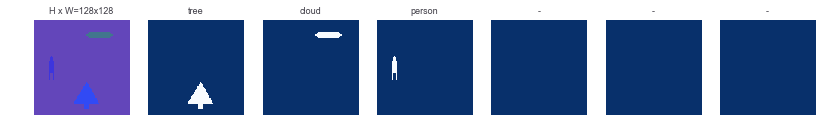

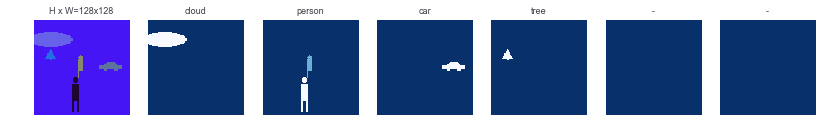

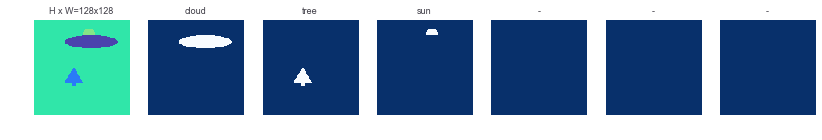

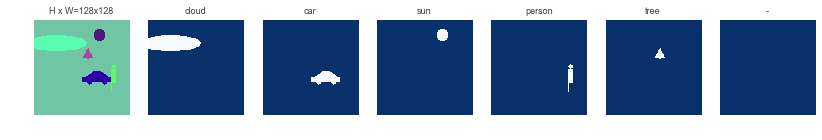

In [5]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names, limit=6)

###  Print some model information 

In [ ]:
print('\n Inputs: ') 
for i, out in enumerate(model.keras_model.inputs):
    print(i , '    ', out)

print('\n Outputs: ') 
for i, out in enumerate(model.keras_model.outputs):
    print(i , '    ', out)


In [ ]:
print('\n Outputs: ') 
pp.pprint(model.keras_model.outputs)
# print('\n Losses (model.metrics_names): ') 
# pp.pprint(model.get_deduped_metrics_names())
# model.keras_model.summary(line_length = 150) 

## Training

Train in two stages:
1. Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass `layers='heads'` to the `train()` function.

    - #### Or now we can pass a list of layers we want to train in layers !
2. Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass `layers="all` to train all layers.

## Training head using  Keras.model.fit_generator()

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
# Wed 09-05-2018
# train_layers = ['mrcnn', 'fpn','rpn']
# loss_names   = [  "rpn_class_loss", "rpn_bbox_loss" , "mrcnn_class_loss", "mrcnn_bbox_loss", "mrcnn_mask_loss"]
train_layers = ['mrcnn', 'fpn','rpn']
loss_names   = [  "rpn_class_loss", "rpn_bbox_loss" , "mrcnn_class_loss", "mrcnn_bbox_loss", "mrcnn_mask_loss"]


model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs = 2500,
#             epochs_to_run =2, 
            layers = train_layers,
            losses= loss_names
            )

## - Training heads using train_in_batches ()

We need to use this method for the time being as the fit generator does not have provide EASY access to the output in Keras call backs. By training in batches, we pass a batch through the network, pick up the generated RoI detections and bounding boxes and generate our semantic / gaussian tensors ...


In [ ]:
model.train_in_batches(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE/6, 
            epochs_to_run = 3,
            layers='heads')

## Fine Tuning
Fine tune all layers

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=211,
            layers="all")

## Save 

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes_2500.h5")
model.keras_model.save_weights(model_path)

###  Define Data Generators, get next shapes from generator and display loaded shapes

### Define Data Generator

In [ ]:
train_generator = data_generator(dataset_train, model.config, shuffle=True,
                                 batch_size=model.config.BATCH_SIZE,
                                 augment = False)
val_generator = data_generator(dataset_val, model.config, shuffle=True, 
                                batch_size=model.config.BATCH_SIZE,
                                augment=False)

### Get next shapes from generator and display loaded shapes

In [ ]:
train_batch_x, train_batch_y = next(train_generator)

In [ ]:
# train_batch_x, train_batch_y = next(train_generator)
imgmeta_idx = model.keras_model.input_names.index('input_image_meta')
img_meta    = train_batch_x[imgmeta_idx]

for img_idx in range(config.BATCH_SIZE):
    image_id = img_meta[img_idx,0]
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    print('Image id: ',image_id)
    print('Image meta', img_meta[img_idx])
    print('Classes (1: circle, 2: square, 3: triangle ): ',class_ids)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)



### Push Data thru model using get_layer_output()

In [ ]:

layers_out = get_layer_output_2(model.keras_model, train_batch_x, 1)


In [ ]:
input_gt_class_ids = train_batch_x[4]

target_class_ids = layers_out[5]
mrcnn_class_logits = layers_out[9]
rpn_class_loss   = layers_out[13]
rpn_bbox_loss    = layers_out[14]
mrcnn_class_loss = layers_out[15]
mrcnn_bbox_loss  = layers_out[16]
mrcnn_mask_loss  = layers_out[17]
active_class_ids = layers_out[20]
# pred_masks = tf.identity(layers_out[18])
# gt_masks   = tf.identity(layers_out[19])

# shape = KB.int_shape(pred_masks)

In [ ]:
print(rpn_class_loss, rpn_bbox_loss)
print(mrcnn_class_loss, mrcnn_bbox_loss, mrcnn_mask_loss)
print(active_class_ids)
print()
print(target_class_ids[1])
print()
print(mrcnn_class_logits[1])
print('gt class ids')
print(input_gt_class_ids)

###  Simulate `mrcnn_class_loss` computation

In [ ]:
print('\n>>> mrcnn_class_loss_graph ' )
print('    target_class_ids  size :', target_class_ids.shape)
print('    pred_class_logits size :', mrcnnpred_class_logits.shape)
print('    active_class_ids  size :', active_class_ids.shape)    
target_class_ids = tf.cast(target_class_ids, 'int64')

# Find predictions of classes that are not in the dataset.

pred_class_ids = tf.argmax(pred_class_logits, axis=2)

# TODO: Update this line to work with batch > 1. Right now it assumes all
#       images in a batch have the same active_class_ids
pred_active = tf.gather(active_class_ids[0], pred_class_ids)

# Loss
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=target_class_ids, logits=pred_class_logits)

# Erase losses of predictions of classes that are not in the active
# classes of the image.
loss = loss * pred_active

# Computer loss mean. Use only predictions that contribute
# to the loss to get a correct mean.
loss = tf.reduce_sum(loss) / tf.reduce_sum(pred_active)
loss = KB.reshape(loss, [1, 1])
return loss


## Plot Predicted and Ground Truth Probability Heatmaps `pred_gaussian` and `gt_gaussian` (Tensorflow)

`pred_gaussian2` and `gt_gaussian2` from Tensorflow PCN layer

In [ ]:
# gt_heatmap  = layers_out[27]     # gt_gaussiam 
# pred_heatmap= layers_out[24]  # pred_gaussian
gt_heatmap  = layers_out[21]     # gt_gaussiam 
pred_heatmap= layers_out[18]  # pred_gaussian
print('gt_gaussian heatmap shape : ', gt_heatmap.shape, ' pred_gaussian heatmap shape: ', pred_heatmap.shape)
num_images = 1 # config.IMAGES_PER_GPU
num_classes = config.NUM_CLASSES

img = 2

image_id = img_meta[img,0]
print('Image id: ',image_id)
print('Classes (1: circle, 2: square, 3: triangle ): ')
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)


for cls in range(num_classes):
    ttl = 'GROUND TRUTH HEATMAP - image :  {} class: {} '.format(img,cls)
    print(' *** Zout  ', gt_heatmap[img,:,:,cls].shape, ttl)   
    plot_gaussian( gt_heatmap[img,:,:,cls], title = ttl)
    
    ttl = 'PREDICTED heatmap  - image :  {} class: {} '.format(img,cls)     
    print(' *** pred_heatmap ', pred_heatmap[img,:,:,cls].shape, ttl)   
    plot_gaussian(pred_heatmap[img,:,:,cls], title = ttl)  



### Plot Output from FCN network `fcn_bilinear` and compare with `pred_gaussian`

In [ ]:
from mrcnn.visualize import plot_gaussian
import matplotlib as plt

%matplotlib inline
img = 2
image_id = img_meta[img,0]
print('Image id: ',image_id)
print('Classes (1: circle, 2: square, 3: triangle ): ')
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)


Zout  = layers_out[21]     # gt_gaussiam 
Zout2 = layers_out[12]     # fcn_bilinear

print(Zout.shape, Zout2.shape)
num_images = config.IMAGES_PER_GPU
num_classes = config.NUM_CLASSES


for cls in range(num_classes):
    ttl = 'GroundTruth - image :  {} class: {} '.format(img,cls)
    print(' *** Zout  ', Zout[img,:,:,cls].shape, ttl)   
    plot_gaussian( Zout[img,:,:,cls], title = ttl)
    
    ttl = 'FCN_Bilinear- image :  {} class: {} '.format(img,cls)     
    print(' *** Zout2 ', Zout2[img,:,:,cls].shape, ttl)   
    plot_gaussian(Zout2[img,:,:,cls], title = ttl)  


### Display ground truth bboxes from Shapes database (using `load_image_gt` )

Here we are displaying the ground truth bounding boxes as provided by the dataset

In [ ]:
img = 0
image_id = img_meta[img,0]
print('Image id: ',image_id)
p_original_image, p_image_meta, p_gt_class_id, p_gt_bbox, p_gt_mask =  \
            load_image_gt(dataset_train, config, image_id, augment=False, use_mini_mask=True)
# print(p_gt_class_id.shape, p_gt_bbox.shape, p_gt_mask.shape)
print(p_gt_bbox[0:3,:])
print(p_gt_class_id)
visualize.draw_boxes(p_original_image, p_gt_bbox[0:3])

# image_id = img_meta[img,0]
# print('Image id: ',image_id)
# p_original_image, p_image_meta, p_gt_class_id, p_gt_bbox, p_gt_mask =  \
#             load_image_gt(dataset_train, config, image_id, augment=False, use_mini_mask=True)
# # print(p_gt_class_id.shape, p_gt_bbox.shape, p_gt_mask.shape)
# print(p_gt_bbox)
# print(p_gt_class_id)
# visualize.draw_boxes(p_original_image, p_gt_bbox)

### Display Predicted  Ground Truth Bounding Boxes  `gt_tensor` and `gt_tensor2`

layers_out[22]  `gt_tensor` is based on input_gt_class_ids and input_normlzd_gt_boxes
layers_out[28]  `gt_tensor2` is based on input_gt_class_ids and input_normlzd_gt_boxes, generated using Tensorflow

Display the Ground Truth bounding boxes from the tensor we've constructed

In [ ]:
from mrcnn.utils  import stack_tensors, stack_tensors_3d
# print(gt_bboxes)
# visualize.display_instances(p_original_image, p_gt_bbox, p_gt_mask, p_gt_class_id, 
#                             dataset_train.class_names, figsize=(8, 8))
# pp.pprint(gt_bboxes)
img = 0
image_id = img_meta[img,0]

print('Image id: ',image_id)
p_image, p_image_meta, p_gt_class_id, p_gt_bbox, p_gt_mask =  \
            load_image_gt(dataset_train, config, image_id, augment=False, use_mini_mask=True)   
gt_bboxes_stacked = stack_tensors_3d(layers_out[22][img])
print(gt_bboxes_stacked)
visualize.draw_boxes(p_image, gt_bboxes_stacked[0:2,2:6])


## Display RoI proposals `pred_bboxes` generated for one class

Display bounding boxes from tensor of proposals produced by the network 
Square: 1 , Circle:2 , Triangle 3

In [ ]:
img = 0
cls = 1 # <==== Class to display
pred_tensor = layers_out[19]   # numpy pred_tesnor
# pred_tensor = layers_out[25]   # tensorflow pred_tensor 

image_id = img_meta[img,0]
print('Image id: ',image_id)
p_image, p_image_meta, p_gt_class_id, p_gt_bbox, p_gt_mask =  \
            load_image_gt(dataset_train, config, image_id, augment=False, use_mini_mask=True)
print(p_image_meta)
print(pred_tensor[img,cls,:].shape)
print(pred_tensor[img,cls])
#+'-'+str(np.around(int(x[1]),decimals = 3))
# class id: str(int(x[6]))+'-'+
caps = [str(int(x[0]))+'-'+str(np.around(x[1],decimals = 3))  for x in pred_tensor[img,cls,:].tolist() ]
print(caps)

visualize.draw_boxes(p_image, pred_tensor[img,cls,:,2:6], captions = caps)

In [ ]:
layers_out[0][0] * [128, 128,128,128]   #output_rois*

### Calculate  mrcnn_bbox_loss

In [ ]:
import keras.backend as K

from mrcnn.utils import apply_box_deltas
from mrcnn.loss  import smooth_l1_loss

target_class_ids = layers_out[1][0:1]
target_bbox      = layers_out[2][0:1]
mrcnn_bbox       = layers_out[10][0:1]
mrcnn_class_ids  = np.argmax(layers_out[9][0:1],axis = -1)     # mrcnn_class_ids

print('target_class_ids', target_class_ids.shape)
print(target_class_ids)  # tgt_class_ids
print(' class with max probability', mrcnn_class_ids.shape)
print(mrcnn_class_ids)
print('target_bboxes', target_bbox.shape)
# print(target_bbox)  # tgt_bounding boxes
print('mrcnn_bboxes',mrcnn_bbox.shape)
# print(mrcnn_bbox)  #mrcnn_bboxes
pred_bbox = mrcnn_bbox

# calc mrcnn_bbox_loss
target_class_ids = K.reshape(target_class_ids, (-1,))
print(target_class_ids.shape)
target_bbox      = K.reshape(target_bbox, (-1, 4))
print('target_bboxx: ', target_bbox.shape)
pred_bbox        = K.reshape(pred_bbox, (-1, pred_bbox.shape[2], 4))
print('pred_bbox : ', pred_bbox.shape)

positive_roi_ix        = tf.where(target_class_ids > 0)[:, 0]
print(positive_roi_ix.eval())
positive_roi_class_ids = tf.cast( tf.gather(target_class_ids, positive_roi_ix), tf.int64)
print(positive_roi_class_ids.eval())
indices                = tf.stack([positive_roi_ix, positive_roi_class_ids], axis=1)
print(indices.eval())


target_bbox = tf.gather(target_bbox, positive_roi_ix)
print(target_bbox.eval())
pred_bbox   = tf.gather_nd(pred_bbox, indices)
print(pred_bbox.eval())

print('tf.size ',tf.size(target_bbox).eval())

diff = K.abs(target_bbox - pred_bbox)
print(diff.eval())

less_than_one = K.cast(K.less(diff, 1.0), "float32")
# print(less_than_one.eval())

loss = (less_than_one * 0.5 * diff**2) + (1 - less_than_one) * (diff - 0.5)
# print( (1-less_than_one).eval())



# loss        = K.switch(tf.size(target_bbox) > 0,
#                 smooth_l1_loss(y_true=target_bbox, y_pred=pred_bbox),
#                 tf.constant(0.0))
print(loss.eval())
sumloss = K.sum(loss)
print(sumloss.eval())
print((sumloss/40).eval())
meanloss        = K.mean(loss)
print(meanloss.eval())

###  Calculate mrcnn_class_loss

In [ ]:
import keras.backend as K

from mrcnn.utils import apply_box_deltas
from mrcnn.loss  import smooth_l1_loss

target_class_ids = layers_out[1][0:1]
pred_class_logits = layers_out[8][0:1]
active_class_ids    = np.array([1,1,1,1])

# mrcnn_class_ids  = np.argmax(layers_out[9][0:1],axis = -1)     # mrcnn_class_ids

print(' target_class_ids', target_class_ids.shape)
print(target_class_ids)  # tgt_class_ids
print(' class logits', pred_class_logits.shape)
print(pred_class_logits)
print(' active, class_ids ', active_class_ids.shape)
print(active_class_ids)  # tgt_bounding boxes

pred_class_ids = tf.argmax(pred_class_logits, axis=2)
print(pred_class_ids.eval())  #mrcnn_bboxes
mrcnn_class_ids  = np.argmax(layers_out[9][0:1],axis = -1)     # mrcnn_class_ids
print(mrcnn_class_ids)
# pred_bbox = mrcnn_bbox
pred_active = tf.to_float(tf.gather(active_class_ids, pred_class_ids))
print(pred_active.eval())
# calc mrcnn_bbox_loss
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
       labels=target_class_ids, logits=pred_class_logits)
print(loss.eval())

loss = loss * tf.to_float(pred_active)
print(loss.eval())

print(tf.reduce_sum(loss).eval())
print(tf.reduce_sum(pred_active).eval())
loss = tf.reduce_sum(loss) / tf.reduce_sum(pred_active)
print(loss.eval())

###  Calculate mrcnn_mask_loss

In [ ]:
import keras.backend as K

from mrcnn.utils import apply_box_deltas
from mrcnn.loss  import smooth_l1_loss

target_class_ids    = layers_out[1][0:3]
target_masks        = layers_out[3][0:3]
pred_masks          = layers_out[11][0:3]
# mrcnn_class_ids  = np.argmax(layers_out[9][0:1],axis = -1)     # mrcnn_class_ids
print('    target_class_ids shape :', target_class_ids.shape)
print('    target_masks     shape :', target_masks.shape)
print('    pred_masks       shape :', pred_masks.shape)    


target_class_ids = K.reshape(target_class_ids, (-1,))
print('    target_class_ids shape :', target_class_ids.shape, '\n', target_class_ids.eval())

mask_shape       = tf.shape(target_masks)
print('    mask_shape       shape :', mask_shape.shape, mask_shape.eval())    

target_masks     = K.reshape(target_masks, (-1, mask_shape[2], mask_shape[3]))
print('    target_masks     shape :', tf.shape(target_masks).eval())        

pred_shape       = tf.shape(pred_masks)
print('    pred_shape       shape :', pred_shape.shape, pred_shape.eval())        

pred_masks       = K.reshape(pred_masks, (-1, pred_shape[2], pred_shape[3], pred_shape[4]))
print('    pred_masks       shape :', tf.shape(pred_masks).eval())        


pred_masks = tf.transpose(pred_masks, [0, 3, 1, 2])
print('    pred_masks       shape :', tf.shape(pred_masks).eval())        

# Only positive ROIs contribute to the loss. And only
# the class specific mask of each ROI.
positive_ix        = tf.where(target_class_ids > 0)[:, 0]
positive_class_ids = tf.cast(tf.gather(target_class_ids, positive_ix), tf.int64)
indices            = tf.stack([positive_ix, positive_class_ids], axis=1)
print(indices.eval())



y_true = tf.gather(target_masks, positive_ix)
print('     y_true shape:', tf.shape(y_true).eval())
y_pred = tf.gather_nd(pred_masks, indices)
print('     y_pred shape:', tf.shape(y_pred).eval())

loss = K.switch(tf.size(y_true) > 0,
                K.binary_crossentropy(target=y_true, output=y_pred),
                tf.constant(0.0))
print(tf.shape(loss).eval())

loss = K.mean(loss)
print('     final loss shape:', tf.shape(loss).eval())
print(loss.eval())
loss = K.reshape(loss, [1, 1])
print('     final loss shape:', tf.shape(loss).eval())
print(loss.eval())

### Calculate a pixel loss on fcn_gaussian and gt_gaussian 

In [ ]:
import keras.backend as K

from mrcnn.utils import apply_box_deltas
from mrcnn.loss  import smooth_l1_loss
pred_masks          = layers_out[12][0:3]
target_masks        = layers_out[27][0:3]

print('    target_masks     shape :', tf.shape(target_masks).eval())
print('    pred_masks       shape :', tf.shape(pred_masks).eval())    

diff = K.abs(target_masks - pred_masks)
print(tf.shape(diff).eval())

less_than_one = K.cast(K.less(diff, 1.0), "float32")
print(tf.shape(less_than_one).eval())

loss = (less_than_one * 0.5 * diff**2) + (1 - less_than_one) * (diff - 0.5)
print(tf.shape(loss).eval())

# print( (1-less_than_one).eval())

# loss = K.switch(tf.size(y_true) > 0,
#                 K.binary_crossentropy(target=y_true, output=y_pred),
#                 tf.constant(0.0))
meanloss = K.mean(loss)
print(tf.shape(meanloss).eval())
print(meanloss.eval())
# loss = K.reshape(loss, [1, 1])
# print('     final loss shape:', loss.get_shape())
# return loss


mask_shape       = tf.shape(target_masks)
print('    mask_shape       shape :', tf.shape(mask_shape).eval())    

target_masks     = K.reshape(target_masks, (-1, mask_shape[1], mask_shape[2]))
print('    target_masks     shape :', tf.shape(target_masks).eval())        

pred_shape       = tf.shape(pred_masks)
print('    pred_shape       shape :', tf.shape(pred_shape).eval())        

pred_masks       = K.reshape(pred_masks, (-1, pred_shape[1], pred_shape[2]))
print('    pred_masks       shape :', tf.shape(pred_masks).eval())
# Permute predicted masks to [N, num_classes, height, width]
# diff = K.abs(target_masks - pred_masks)
# print(tf.shape(diff).eval())

# less_than_one = K.cast(K.less(diff, 1.0), "float32")
# print(tf.shape(less_than_one).eval())

# loss = (less_than_one * 0.5 * diff**2) + (1 - less_than_one) * (diff - 0.5)
# print(tf.shape(loss).eval())

# meanloss = K.mean(loss)
# print(tf.shape(meanloss).eval())
# print(meanloss.eval())

loss = K.switch(tf.size(target_masks) > 0,
                smooth_l1_loss(y_true=target_masks, y_pred=pred_masks),
                tf.constant(0.0))
loss = K.mean(loss)
loss = K.reshape(loss, [1, 1])
print('     final loss shape:', loss.get_shape())
print(loss.eval())

###  Mean values of GT, Pred, and FCN heatmaps 

In [ ]:
pred_masks = tf.identity(layers_out[24])
gt_masks = tf.identity(layers_out[27])
fcn_masks = tf.identity(layers_out[12])
print(gt_masks.shape, fcn_masks.shape)
for img in range(5):
    for cls in range(4):
        gt_mean = K.mean(gt_masks[img,:,:,cls])
        fcn_mean= K.mean(fcn_masks[img,:,:,cls])
        pred_mean= K.mean(pred_masks[img,:,:,cls])
        print('Img/Cls: ', img, '/', cls,'    gtmean: ', gt_mean.eval(), '\t fcn : ' , fcn_mean.eval(), '\t pred :', pred_mean.eval())

In [ ]:
img  = 0
class_probs = layers_out[9][img]   # mrcnn_class
deltas      = layers_out[10][img]       # mrcnn_bbox

print(class_probs.shape)
print('class probabilities')
print(class_probs)
class_ids = np.argmax(layers_out[9][img],axis = 1)     # mrcnn_class_ids
print(' class with max probability')
print(class_ids)


# layers_out[10][2,0,3]
print('deltas.shape :', deltas.shape)
print(deltas[0:4])

deltas_specific = deltas[np.arange(32),class_ids]
print('deltas of max prob class: ', deltas_specific.shape)
print(deltas_specific[0:5])
output_rois = layers_out[0][img]*[128,128,128,128]
print('output_rois: ', output_rois.shape)
print(output_rois[0:])

refined_rois    = apply_box_deltas(output_rois, deltas_specific * config.BBOX_STD_DEV)
print('refined rois: ',refined_rois.shape)
print(refined_rois)

In [ ]:
img = 0
cls = 0
fcn_out = layers_out[12][img]
fcn_sum = np.sum(fcn_out, axis=(0,1))
print(fcn_sum)
for cls in range(4):
    print('min :', np.min(fcn_out[:,:,cls]), 'max :', np.max(fcn_out[:,:,cls]), )

In [ ]:
print(train_batch_x[4][2])
print(train_batch_x[5][2]/[128,128,128,128])